In [31]:
''' Importing the necessary libraries '''
import numpy as np
import matplotlib.pyplot as plt

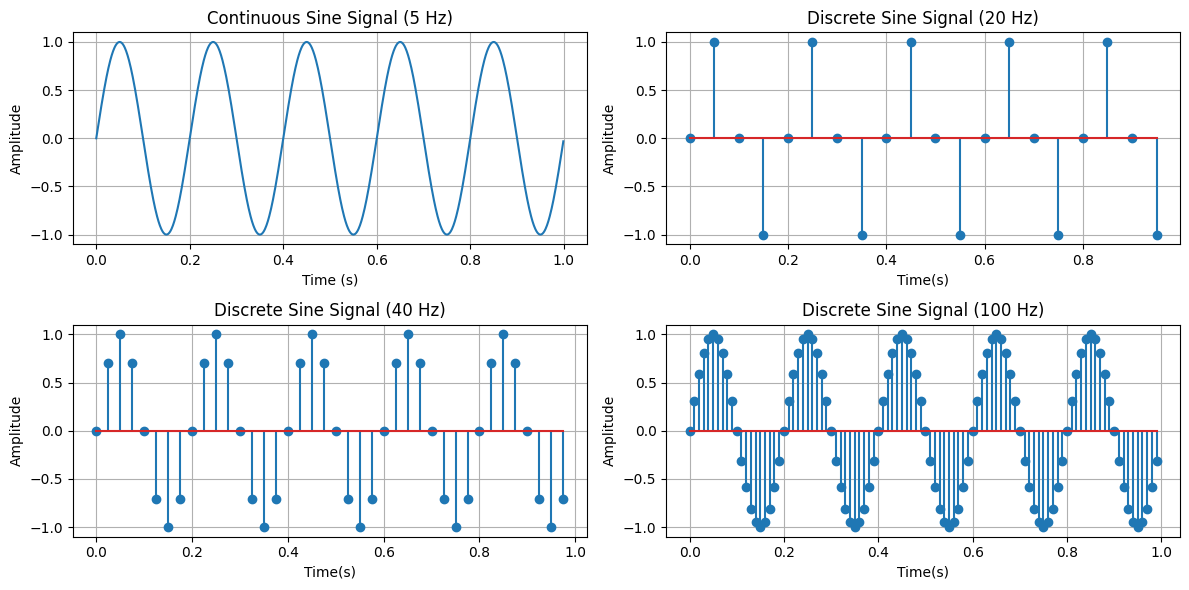

In [32]:
''' 1: Generating a sinusoidal signal. '''
''' Parameters '''
A = 1   # Amplitude
f = 5   # Frequency in hz
duration = 1    # Duration in seconds
Fs_con = 1000   # Continuous sampling frequency
Fs_disc = [20, 40, 100] # Discrete sampling frequencies

# Time vectors
t_con = np.linspace(0, duration, int(Fs_con * duration), endpoint=False)
sin_sig = A * np.sin(2 * np.pi * f * t_con)

# (a) plotting the continuouse version
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(t_con, sin_sig)
plt.title('Continuous Sine Signal (5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# (b) Sampling and Plotting the signal at discrete samping rates
for i, Fs in enumerate(Fs_disc):
    t_disc = np.arange(0, duration, 1/Fs)
    disc_sig = A * np.sin(2 * np.pi * f * t_disc)
    plt.subplot(2, 2, i+2)
    plt.stem(t_disc, disc_sig)
    plt.title(f'Discrete Sine Signal ({Fs} Hz)')
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()

**Inference**: Higher sampling rates provide a better representation fo the signal. Lower sampling rates can lead to aliasing and loss of information.



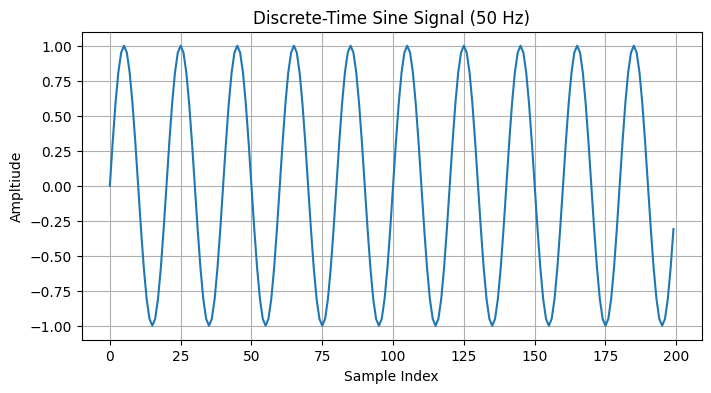

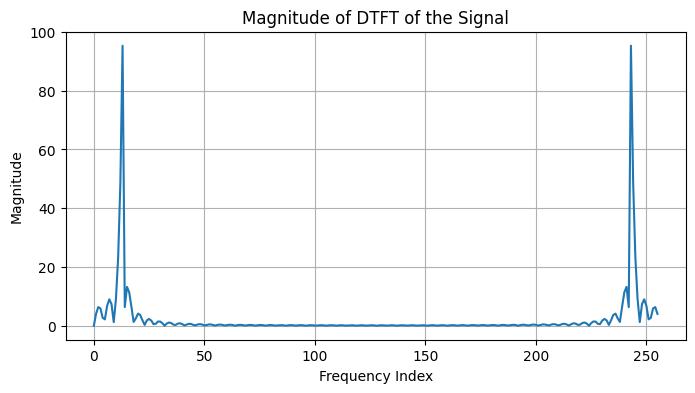

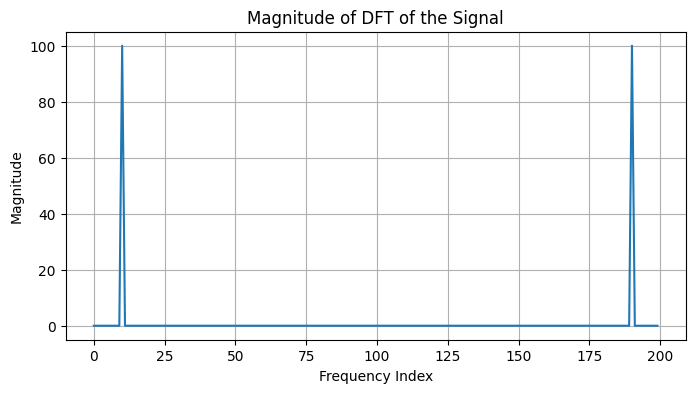

In [33]:
''' 2. Generate a discrete-time sine signal. '''
'''Parameters'''
f0 = 50     # Frequenct in hz
Fs = 1000   # sampling frequency
n_samples = 200 # number of samples
n = np.arange(n_samples)

# (a) Discrete-time sine signal
x_n = np.sin(2 * np.pi * f0 / Fs * n)

plt.figure(figsize=(8,4))
plt.plot(n, x_n)
plt.title('Discrete-Time Sine Signal (50 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Ampltiude')
plt.grid()
plt.show()

# (b) Compute the DTFT
def DTFT(x, N):
    n = np.arange(len(x))  # time index of input signal
    k = np.arange(N)       # frequency index for DTFT
    # Create the complex exponential with shape (N, len(x))
    dtft = np.sum(x[None, :] * np.exp(-1j * 2 * np.pi * k[:, None] * n / N), axis=1)
    return dtft

N = 256 # Number of points in DTFT
dtft_res = DTFT(x_n, N)

# plot DTFT result
plt.figure(figsize=(8,4))
plt.plot(np.abs(dtft_res))
plt.title('Magnitude of DTFT of the Signal')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# (c) Compute the DFT
dft_res = np.fft.fft(x_n)

# plto DFT result
plt.figure(figsize=(8, 4))
plt.plot(np.abs(dft_res))
plt.title('Magnitude of DFT of the Signal')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

**(d) Comment on the similarities and differences of DFT and DTFT.**

- Both DFT and DTFT provide frequency domain representation.
- DTFT is continuous in frequency, while DFT is discrete.
- The DFT is a sampled version of the DTFT at specific frequency points.

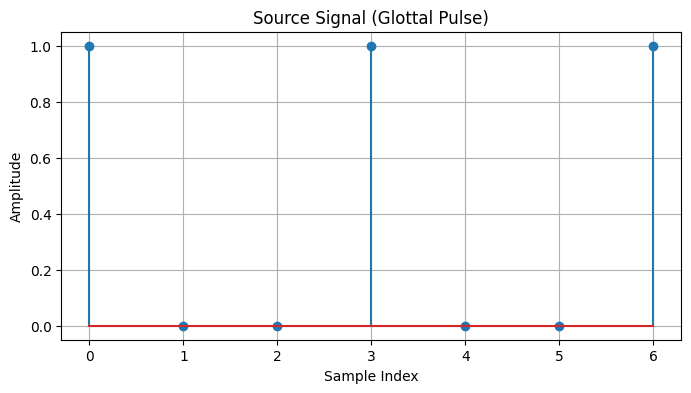

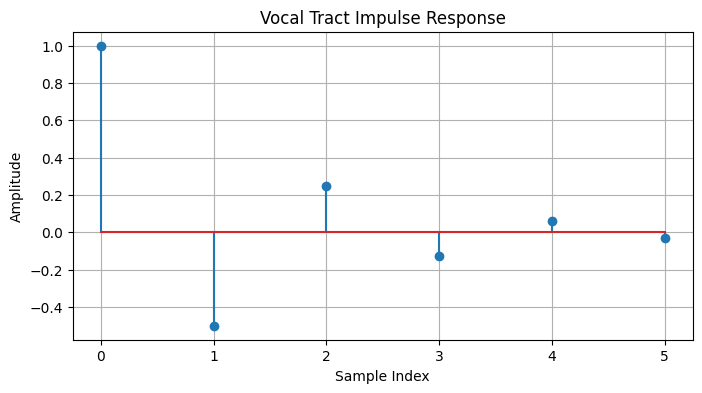

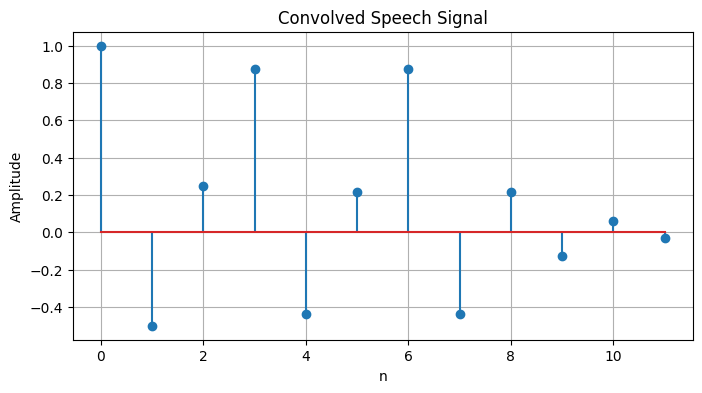

In [34]:
''' 3. Source-filter model for speech synthesis. '''
# (a) Generate a discrete-time source signal
x_n = np.array([1, 0, 0, 1, 0, 0, 1])

plt.figure(figsize=(8, 4))
plt.stem(x_n)
plt.title('Source Signal (Glottal Pulse)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# (b) Define a vocal tract model
h_n = np.array([1, -0.5, 0.25, -0.125, 0.0625, -0.03125])

plt.figure(figsize=(8, 4))
plt.stem(h_n)
plt.title('Vocal Tract Impulse Response')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# (c) Perform linear convolution
y_n = np.convolve(x_n, h_n, mode='full')    # convolved speech signal
n_y = np.arange(len(y_n))   # TIme indices for y(n)

plt.figure(figsize=(8, 4))
plt.stem(n_y, y_n)
plt.title('Convolved Speech Signal')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

**(d) Comment on how the filtering process shapes the source signal based on the convolution result.**
- The source signal (impulse train) represents glottal pulses in voiced speech.
- The vocal tract filter shapes the source signal by adding resonant characteristics.
- The convolution result shows how the filter smooths the sharp impulses and creates speech-like characteristics.
- This demonstrates the basic principle of how speech sounds are produced through source-filter interaction.